# Imports:

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

# Read dataset:

In [2]:
df = pd.read_csv('/content/winequality-white-balanced.csv', sep=",")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3284 non-null   float64
 1   volatile acidity      3284 non-null   float64
 2   citric acid           3284 non-null   float64
 3   residual sugar        3284 non-null   float64
 4   chlorides             3284 non-null   float64
 5   free sulfur dioxide   3284 non-null   float64
 6   total sulfur dioxide  3284 non-null   float64
 7   density               3284 non-null   float64
 8   pH                    3284 non-null   float64
 9   sulphates             3284 non-null   float64
 10  alcohol               3284 non-null   float64
 11  quality               3284 non-null   int64  
 12  class                 3284 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 333.7 KB


In [3]:
df['class'].value_counts()

1    1644
0    1640
Name: class, dtype: int64

# Preprocessing:

In [4]:
df['labels'] = df['class']

In [5]:
df['labels'].value_counts()

1    1644
0    1640
Name: labels, dtype: int64

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,labels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1,1


In [6]:
df_numerical = df.drop(['quality', 'class', 'labels'], axis=1)

In [ ]:
df_numerical.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [7]:
scaling = StandardScaler()
df_numerical_scaled = scaling.fit_transform(df_numerical)

In [8]:
len(df_numerical_scaled)

3284

In [9]:
len(df_numerical_scaled[0])

11

In [10]:
features = df_numerical_scaled
labels = df['labels']

In [ ]:
len(features[0])

11

In [12]:
features[0]

array([ 0.15315591, -0.14224208,  0.20012365,  2.66456234, -0.1263427 ,
        0.54802731,  0.63801603,  2.25669865, -1.19656255, -0.32392851,
       -1.31795428])

In [11]:
len(features)

3284

# Split dataset:

In [ ]:
random_state = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)  # 0.33 0.2
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

# Helper functions:

In [ ]:
def print_metrics(prediction, real):

    print("Accuracy:", accuracy_score(prediction, real))
    print("Precision:", precision_score(prediction, real))
    print("Recall:", recall_score(prediction, real))
    print("F1-Score:", f1_score(prediction, real))
    print("ROC-AUC:", roc_auc_score(prediction, real))

In [ ]:
def plot_learning_curve_f1(model, X, y, title):    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, 
                                                             scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="r", label='Training Scores')
    ax.plot(np.linspace(0.1, 1.0, 10)*100, valid_scores_mean, 'o-', color="g", label='Validation Scores')

    ax.set_xlabel('Training Size (in percent)')
    ax.set_ylabel('Mean F1 Score')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

# Decision Tree:

## Default tree:

In [ ]:
default_tree = DecisionTreeClassifier(random_state=random_state)

start_time = time.time()
default_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_default_tree = default_tree.predict(X_test)

print_metrics(pred_default_tree, y_test)

print('Training Accuracy is:', default_tree.score(X_train, y_train))

Training time is: 0.0216219425201416
Accuracy: 0.7269372693726938
Precision: 0.7370441458733206
Recall: 0.7071823204419889
F1-Score: 0.7218045112781956
ROC-AUC: 0.7269737849899408
Training Accuracy is: 1.0


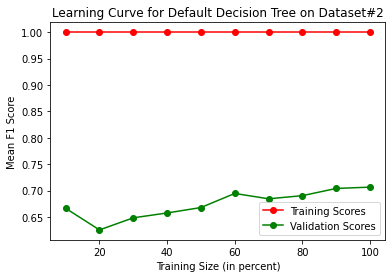

In [ ]:
plot_learning_curve_f1(default_tree, X_train, y_train, 'Learning Curve for Default Decision Tree on Dataset#2')

In [ ]:
default_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## pre pruning: try 1

In [ ]:
params = {'max_depth': range(1, 10, 5),
         'min_samples_split': range(2, 200, 20),
         'min_samples_leaf': range(1, 100, 20)}

clf = DecisionTreeClassifier(criterion='gini', random_state=random_state)

gcv = GridSearchCV(estimator=clf, param_grid=params, cv=5,
                   scoring='accuracy', return_train_score=True)
gcv.fit(X_train,y_train)

pre_pruning_tree = gcv.best_estimator_

start_time = time.time()
pre_pruning_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_pre_pruning_tree = pre_pruning_tree.predict(X_test)

print_metrics(pred_pre_pruning_tree, y_test)

print("Training Accuracy is:", pre_pruning_tree.score(X_train, y_train))

Training time is: 0.009747505187988281
Accuracy: 0.6946494464944649
Precision: 0.7946257197696737
Recall: 0.6489028213166145
F1-Score: 0.7144089732528043
ROC-AUC: 0.7044962537076345
Training Accuracy is: 0.7663636363636364


In [ ]:
pre_pruning_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

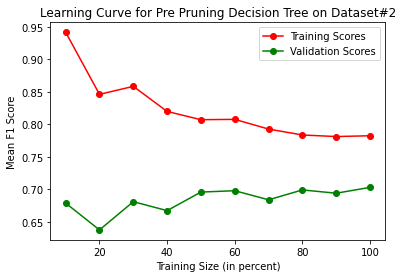

In [ ]:
plot_learning_curve_f1(pre_pruning_tree, X_train, y_train, 'Learning Curve for Pre Pruning Decision Tree on Dataset#2')

## pre pruning: try 2

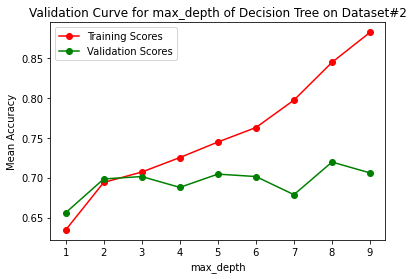

In [ ]:
clfs = []
for i in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=i, random_state=random_state)
    tree.fit(X_training, y_training)
    clfs.append(tree)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 10), training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 10), validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('max_depth')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for max_depth of Decision Tree on Dataset#2')
ax.legend()
plt.show(fig)

In [ ]:
# max_depth=2
max_depth_tree = DecisionTreeClassifier(max_depth=3, random_state=random_state)

start_time = time.time()
max_depth_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_max_depth_tree = max_depth_tree.predict(X_test)

print_metrics(pred_max_depth_tree, y_test)

print("Training Accuracy is:", max_depth_tree.score(X_train, y_train))

Training time is: 0.008729696273803711
Accuracy: 0.7075645756457565
Precision: 0.710172744721689
Recall: 0.6902985074626866
F1-Score: 0.7000946073793756
ROC-AUC: 0.7073755311036061
Training Accuracy is: 0.7077272727272728


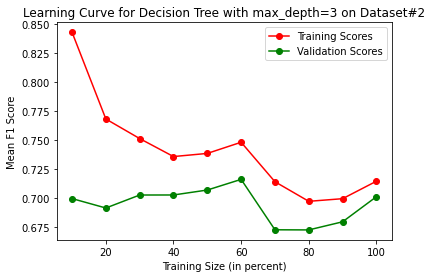

In [ ]:
plot_learning_curve_f1(max_depth_tree, X_train, y_train, 'Learning Curve for Decision Tree with max_depth=3 on Dataset#2')

In [ ]:
max_depth_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## post pruning:

In [ ]:
clf = DecisionTreeClassifier(random_state=random_state)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00029876 0.00034091 0.00038961 0.00040404 0.00040909
 0.00040909 0.00040909 0.00041322 0.00041502 0.00041667 0.00041667
 0.00041847 0.00042614 0.00042781 0.00043062 0.00043237 0.0004329
 0.00043388 0.00043561 0.00043561 0.00043561 0.00043988 0.00044077
 0.00044192 0.00044226 0.0004426  0.00044318 0.0004465  0.00044709
 0.00044744 0.00045455 0.00045455 0.00054545 0.00055195 0.00055758
 0.00060606 0.00060606 0.00060606 0.00060606 0.00060606 0.00060606
 0.00060606 0.00060606 0.00060606 0.00060606 0.00060606 0.00060606
 0.00060606 0.00060606 0.00060606 0.00060606 0.00060606 0.00060982
 0.00061364 0.00064291 0.00065856 0.00068182 0.00068182 0.00068182
 0.00068182 0.00068182 0.00068182 0.00069264 0.00069264 0.00069264
 0.0006993  0.00070513 0.00070707 0.00072628 0.00072727 0.00072727
 0.00072727 0.00072727 0.00072727 0.00073821 0.00074329 0.00075235
 0.00075758 0.00075758 0.00075758 0.00075758 0.00075758 0.00075758
 0.00075758 0.00075758 0.00075758 0.00075936 0.00076015 0.00076

In [ ]:
len(ccp_alphas)

212

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=random_state)
    clf.fit(X_train, y_train)
    clfs.append(clf)

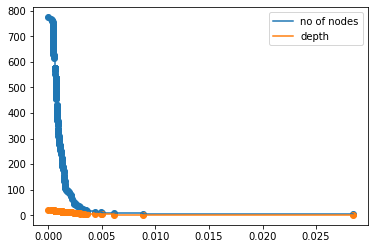

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)

plt.plot(ccp_alphas, node_counts, label='no of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='depth', drawstyle="steps-post")

plt.legend()
plt.show()

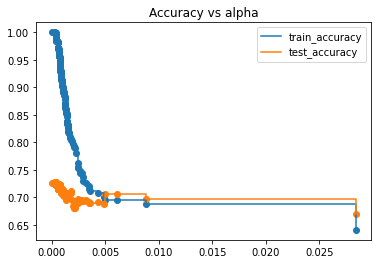

In [ ]:
train_acc = []
test_acc = []

for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)

plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")

plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

### We can choose alpha = 0.01:





In [ ]:
# ccp_alpha=0.01
ccp_alpha_tree = DecisionTreeClassifier(ccp_alpha=0.01, random_state=random_state)

start_time = time.time()
ccp_alpha_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_ccp_alpha_tree = ccp_alpha_tree.predict(X_test)

print_metrics(pred_ccp_alpha_tree, y_test)

print("Training Accuracy is:", ccp_alpha_tree.score(X_train, y_train))

Training time is: 0.025481462478637695
Accuracy: 0.6974169741697417
Precision: 0.7562380038387716
Recall: 0.6621848739495798
F1-Score: 0.7060931899641577
ROC-AUC: 0.7012355862590434
Training Accuracy is: 0.6881818181818182


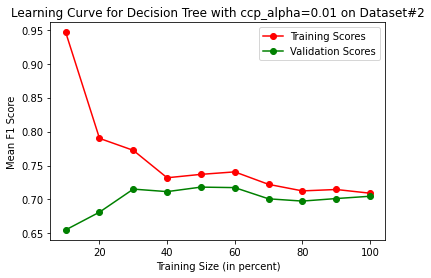

In [ ]:
plot_learning_curve_f1(ccp_alpha_tree, X_train, y_train, 'Learning Curve for Decision Tree with ccp_alpha=0.01 on Dataset#2')

In [ ]:
ccp_alpha_tree

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# KNN

## Default KNN:

In [ ]:
knn_clf = KNeighborsClassifier()

start_time = time.time()
knn_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_knn_clf = knn_clf.predict(X_test)

print_metrics(pred_knn_clf, y_test)

print("Training Accuracy is:", knn_clf.score(X_train, y_train))

Training time is: 0.01111602783203125
Accuracy: 0.6946494464944649
Precision: 0.6967370441458733
Recall: 0.6772388059701493
F1-Score: 0.6868495742667928
ROC-AUC: 0.6944588190434688
Training Accuracy is: 0.805


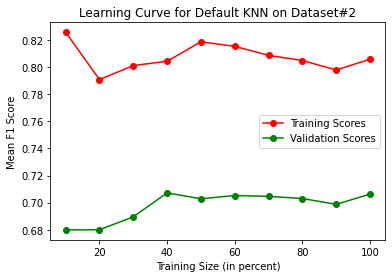

In [ ]:
plot_learning_curve_f1(knn_clf, X_train, y_train, 'Learning Curve for Default KNN on Dataset#2')

In [ ]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Tuning K:

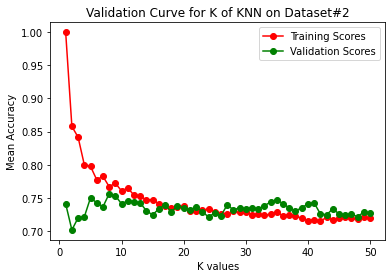

In [ ]:
clfs = []
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training, y_training)
    clfs.append(knn)
    
training_score = [i.score(X_training, y_training) for i in clfs]
testing_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 51) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 51) , testing_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('K values')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for K of KNN on Dataset#2')
ax.legend()
plt.show(fig)

In [ ]:
# k=26
k_knn = KNeighborsClassifier(n_neighbors=26)

start_time = time.time()
k_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_k_knn = k_knn.predict(X_test)

print_metrics(pred_k_knn, y_test)

print("Training Accuracy is:", k_knn.score(X_train, y_train))

Training time is: 0.012568473815917969
Accuracy: 0.7214022140221402
Precision: 0.710172744721689
Recall: 0.710172744721689
F1-Score: 0.710172744721689
ROC-AUC: 0.7209833528226562
Training Accuracy is: 0.7440909090909091


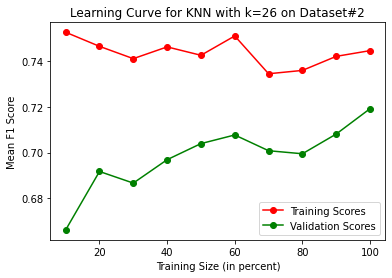

In [ ]:
plot_learning_curve_f1(k_knn, X_train, y_train, 'Learning Curve for KNN with k=26 on Dataset#2')

In [ ]:
k_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [ ]:
# k=19
k_knn = KNeighborsClassifier(n_neighbors=19)

start_time = time.time()
k_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_k_knn = k_knn.predict(X_test)

print_metrics(pred_k_knn, y_test)

print("Training Accuracy is:", k_knn.score(X_train, y_train))

Training time is: 0.003751993179321289
Accuracy: 0.7195571955719557
Precision: 0.7351247600767754
Recall: 0.697632058287796
F1-Score: 0.7158878504672898
ROC-AUC: 0.7198440665270756
Training Accuracy is: 0.74


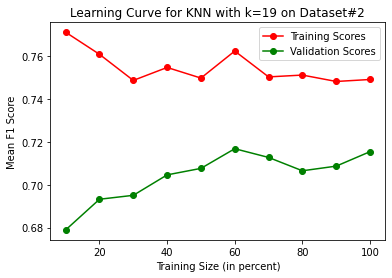

In [ ]:
plot_learning_curve_f1(k_knn, X_train, y_train, 'Learning Curve for KNN with k=19 on Dataset#2')

In [ ]:
k_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

## Tuning more:

In [ ]:
params = {'n_neighbors' : [5, 30, 50],
          'metric' : ['minkowski', 'euclidean', 'manhattan']}

clf = KNeighborsClassifier()

gcv = GridSearchCV(clf, params, cv=5, scoring='accuracy', return_train_score=True)

gcv.fit(X_train,y_train)
best_knn = gcv.best_estimator_

start_time = time.time()
best_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_best_knn = best_knn.predict(X_test)

print_metrics(pred_best_knn, y_test)

print("Training Accuracy is:", best_knn.score(X_train, y_train))

Training time is: 0.003031015396118164
Accuracy: 0.7223247232472325
Precision: 0.7197696737044146
Recall: 0.7075471698113207
F1-Score: 0.7136060894386298
ROC-AUC: 0.7220046318370683
Training Accuracy is: 0.7386363636363636


In [ ]:
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

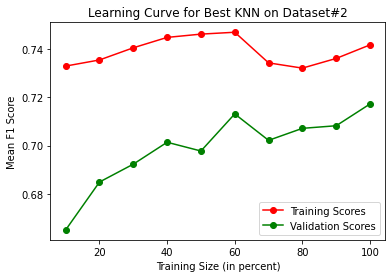

In [ ]:
plot_learning_curve_f1(best_knn, X_train, y_train, 'Learning Curve for Best KNN on Dataset#2')

# Adaboost

## Default:

In [ ]:
model_ABC = AdaBoostClassifier(random_state=random_state)

start_time = time.time()
model_ABC.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC = model_ABC.predict(X_test)

print_metrics(pred_model_ABC, y_test)

print("Training Accuracy is:", model_ABC.score(X_train, y_train))

Training time is: 0.18366050720214844
Accuracy: 0.7186346863468634
Precision: 0.72552783109405
Recall: 0.7
F1-Score: 0.7125353440150801
ROC-AUC: 0.7185661764705882
Training Accuracy is: 0.7545454545454545


In [ ]:
model_ABC

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

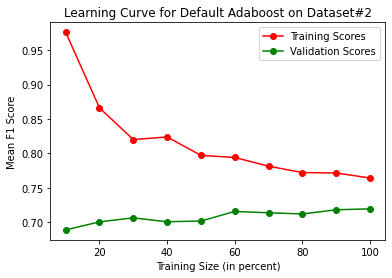

In [ ]:
plot_learning_curve_f1(model_ABC, X_train, y_train, 'Learning Curve for Default Adaboost on Dataset#2')

## Default boosted tree:

In [ ]:
tree = DecisionTreeClassifier(random_state=random_state)

model_ABC_dt = AdaBoostClassifier(tree, random_state=random_state)

start_time = time.time()
model_ABC_dt.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC_dt = model_ABC_dt.predict(X_test)

print_metrics(pred_model_ABC_dt, y_test)

print("Training Accuracy is:", model_ABC_dt.score(X_train, y_train))

Training time is: 0.02494072914123535
Accuracy: 0.7269372693726938
Precision: 0.7408829174664108
Recall: 0.7056672760511883
F1-Score: 0.7228464419475656
ROC-AUC: 0.7271353140032477
Training Accuracy is: 1.0


In [ ]:
model_ABC_dt

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

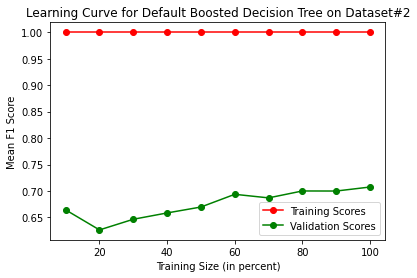

In [ ]:
plot_learning_curve_f1(model_ABC_dt, X_train, y_train, 'Learning Curve for Default Boosted Decision Tree on Dataset#2')

## Tune n_estimators:

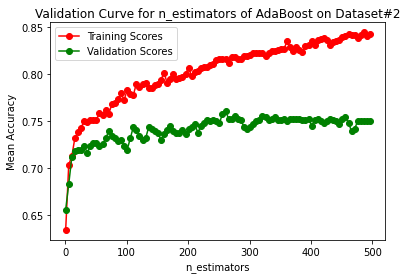

In [ ]:
clfs = []
for i in range(1, 500, 5):
    ABC = AdaBoostClassifier(n_estimators=i, random_state=random_state)
    ABC.fit(X_training, y_training)
    clfs.append(ABC)
    
training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 500, 5) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 500, 5) , validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for n_estimators of AdaBoost on Dataset#2')
ax.legend()
plt.show(fig)

## Tune n_estimators for Boosted Decision Tree:

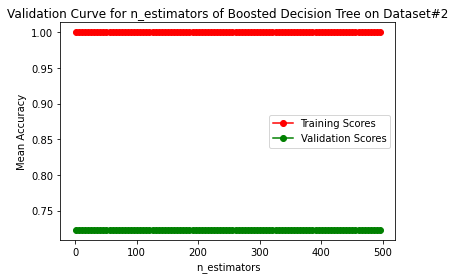

In [ ]:
tree = DecisionTreeClassifier(random_state=random_state)
clfs = []
for i in range(1, 500, 5):
    ABC = AdaBoostClassifier(tree, n_estimators=i, random_state=random_state)
    ABC.fit(X_training, y_training)
    clfs.append(ABC)
    
training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 500, 5) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 500, 5) , validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for n_estimators of Boosted Decision Tree on Dataset#2')
ax.legend()
plt.show(fig)

### we can choose n_estimator=20:

In [ ]:
# n_estimator=20 for ABC model
model_ABC_estimator = AdaBoostClassifier(n_estimators=20, random_state=random_state)

start_time = time.time()
model_ABC_estimator.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC_estimator = model_ABC_estimator.predict(X_test)

print_metrics(pred_model_ABC_estimator, y_test)

print("Training Accuracy is:", model_ABC_estimator.score(X_train, y_train))

Training time is: 0.07573175430297852
Accuracy: 0.7020295202952029
Precision: 0.7236084452975048
Recall: 0.6780575539568345
F1-Score: 0.7000928505106778
ROC-AUC: 0.7026651406147809
Training Accuracy is: 0.7277272727272728


In [ ]:
model_ABC_estimator

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=42)

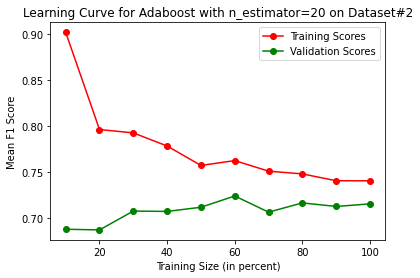

In [ ]:
plot_learning_curve_f1(model_ABC_estimator, X_train, y_train, 'Learning Curve for Adaboost with n_estimator=20 on Dataset#2')

## Post Pruning:

#### aggressive:

In [ ]:
clf = DecisionTreeClassifier(random_state=random_state)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
len(ccp_alphas)

212

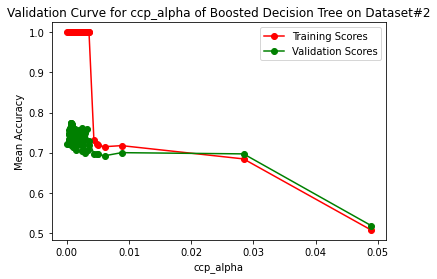

In [ ]:
clfs = []
prune_size = ccp_alphas

for i in prune_size:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    ABC_clf = AdaBoostClassifier(tree,
                          n_estimators=20, random_state=random_state)
    ABC_clf.fit(X_training, y_training)
    clfs.append(ABC_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(prune_size, training_score, 'o-', color="r", label='Training Scores')
ax.plot(prune_size, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for ccp_alpha of Boosted Decision Tree on Dataset#2')
ax.legend()
plt.show(fig)

we can choose ccp_alpha=0.02

In [ ]:
# ccp_alpha=0.01 , n_estimator=20
tree = DecisionTreeClassifier(ccp_alpha=0.01, random_state=random_state)
pruned_ABC_estimator = AdaBoostClassifier(tree, n_estimators=20, random_state=random_state)

start_time = time.time()
pruned_ABC_estimator.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_pruned_ABC_estimator = pruned_ABC_estimator.predict(X_test)

print_metrics(pred_pruned_ABC_estimator, y_test)

print("Training Accuracy is:", pruned_ABC_estimator.score(X_train, y_train))

Training time is: 0.714409351348877
Accuracy: 0.7075645756457565
Precision: 0.7178502879078695
Recall: 0.6875
F1-Score: 0.7023474178403757
ROC-AUC: 0.7076388888888889
Training Accuracy is: 0.6959090909090909


In [ ]:
pruned_ABC_estimator

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.02,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

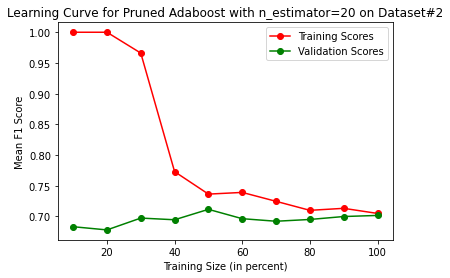

In [ ]:
plot_learning_curve_f1(pruned_ABC_estimator, X_train, y_train, 'Learning Curve for Pruned Adaboost with n_estimator=20 on Dataset#2')

In [ ]:
params =  [{'base_estimator__ccp_alpha':[0, 0.004, 0.005, 0.01, 0.02],
                'n_estimators':range(10, 50, 4)}]

tree = DecisionTreeClassifier(random_state=random_state)

ABC_clf = AdaBoostClassifier(tree, random_state=random_state)

ABC_grid_clf = GridSearchCV(ABC_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
ABC_grid_clf.fit(X_train, y_train)
ABC_grid_best = ABC_grid_clf.best_estimator_

start_time = time.time()
ABC_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_ABC = ABC_grid_best.predict(X_test)

print_metrics(pred_ABC, y_test)

print("Training Accuracy is:", ABC_grid_best.score(X_train, y_train))

Training time is: 0.26864075660705566
Accuracy: 0.6992619926199262
Precision: 0.7063339731285988
Recall: 0.6802218114602587
F1-Score: 0.6930320150659134
ROC-AUC: 0.6992269278295768
Training Accuracy is: 0.7440909090909091


In [ ]:
ABC_grid_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.004,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

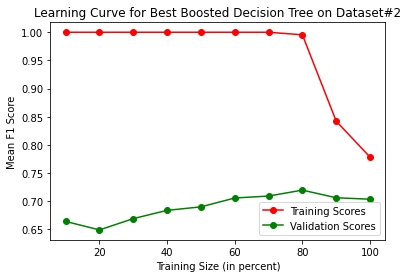

In [ ]:
plot_learning_curve_f1(ABC_grid_best, X_train, y_train, 'Learning Curve for Best Boosted Decision Tree on Dataset#2')

# SVM

## Default SVM:

In [ ]:
svm_clf = SVC()

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 0.21729564666748047
Accuracy: 0.7361623616236163
Precision: 0.727447216890595
Recall: 0.7246653919694073
F1-Score: 0.7260536398467433
ROC-AUC: 0.7357729811896947
Training Accuracy is: 0.7868181818181819


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

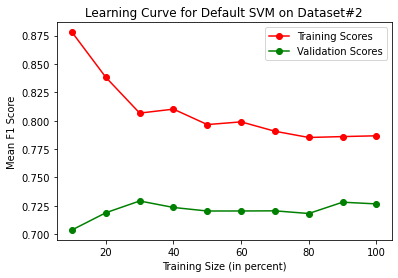

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for Default SVM on Dataset#2')

## Tune kernels:

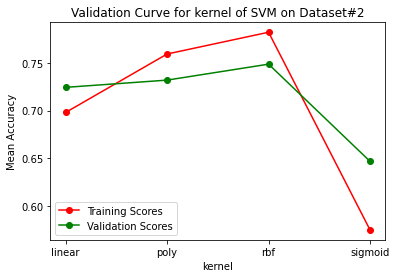

In [ ]:
clfs = []
kernel_list = ['linear','poly', 'rbf', 'sigmoid']

for i in kernel_list:
    svm_clf = SVC(kernel=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(kernel_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(kernel_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('kernel')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for kernel of SVM on Dataset#2')
ax.legend()
plt.show(fig)

## Tune C:

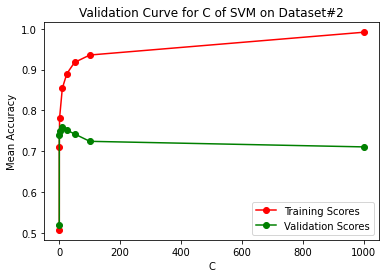

In [ ]:
clfs = []
C_list = [0.001, 0.10, 1, 10, 25, 50, 100, 1000]

for i in C_list:
    svm_clf = SVC(C=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(C_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(C_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('C')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for C of SVM on Dataset#2')
ax.legend()
plt.show(fig)

## Tune gamma:

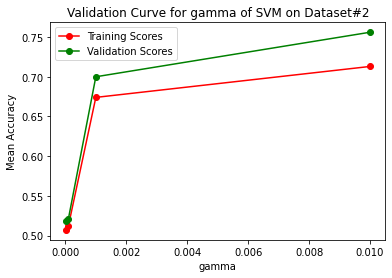

In [ ]:
clfs = []
gamma_list = [1e-2, 1e-3, 1e-4, 1e-5]

for i in gamma_list:
    svm_clf = SVC(gamma=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(gamma_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(gamma_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('gamma')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for gamma of SVM on Dataset#2')
ax.legend()
plt.show(fig)

## kernel=linear, default:

In [ ]:
svm_clf = SVC(kernel='linear')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 0.24411845207214355
Accuracy: 0.7149446494464945
Precision: 0.6871401151631478
Recall: 0.7103174603174603
F1-Score: 0.6985365853658536
ROC-AUC: 0.7146414887794199
Training Accuracy is: 0.7059090909090909


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

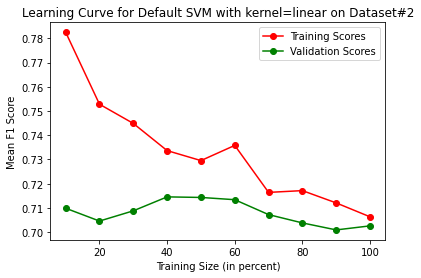

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for Default SVM with kernel=linear on Dataset#2')

## kernel=linear, grid search cv:

In [ ]:
params =  [{'C': [0.1, 1, 10, 100]}]

svm_clf = SVC(kernel='linear', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 0.10008358955383301
Accuracy: 0.7149446494464945
Precision: 0.6928982725527831
Recall: 0.707843137254902
F1-Score: 0.7002909796314258
ROC-AUC: 0.7145487463277995
Training Accuracy is: 0.7090909090909091


In [ ]:
svm_grid_best

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

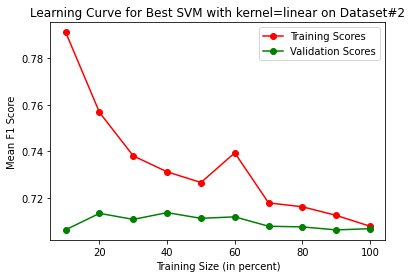

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=linear on Dataset#2')

## kernel=poly, default:

In [ ]:
svm_clf = SVC(kernel='poly')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 0.17524957656860352
Accuracy: 0.709409594095941
Precision: 0.7332053742802304
Recall: 0.6845878136200717
F1-Score: 0.7080630213160335
ROC-AUC: 0.710164629243496
Training Accuracy is: 0.7513636363636363


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

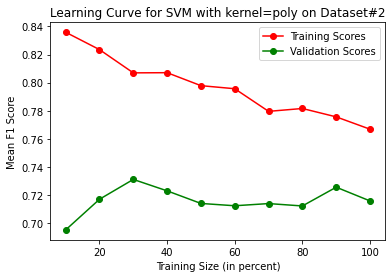

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for SVM with kernel=poly on Dataset#2')

## kernel=poly, grid search cv:

In [ ]:
params =  [{'C': [10, 50, 100, 1000],
                'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

svm_clf = SVC(kernel='poly', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 0.15622830390930176
Accuracy: 0.709409594095941
Precision: 0.7332053742802304
Recall: 0.6845878136200717
F1-Score: 0.7080630213160335
ROC-AUC: 0.710164629243496
Training Accuracy is: 0.7531818181818182


In [ ]:
svm_grid_best

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

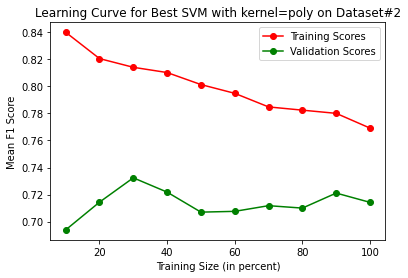

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=poly on Dataset#2')

## kernel=rbf, default:

In [ ]:
svm_clf = SVC(kernel='rbf')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 0.19393110275268555
Accuracy: 0.7361623616236163
Precision: 0.727447216890595
Recall: 0.7246653919694073
F1-Score: 0.7260536398467433
ROC-AUC: 0.7357729811896947
Training Accuracy is: 0.7868181818181819


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

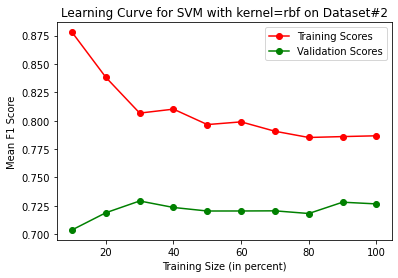

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for SVM with kernel=rbf on Dataset#2')

## kernel=rbf, grid search cv:

In [ ]:
params =  [{'C': [10, 50, 100, 1000],
                'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

svm_clf = SVC(kernel='rbf', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 0.2628355026245117
Accuracy: 0.7333948339483395
Precision: 0.7351247600767754
Recall: 0.7172284644194756
F1-Score: 0.7260663507109004
ROC-AUC: 0.7331596867551924
Training Accuracy is: 0.7527272727272727


In [ ]:
svm_grid_best

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

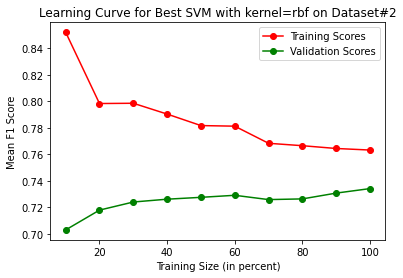

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=rbf on Dataset#2')

# Neural Networks

## Default NN:

In [ ]:
mlp_clf = MLPClassifier(random_state=random_state)

start_time = time.time()
mlp_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_mlp_clf = mlp_clf.predict(X_test)

print_metrics(pred_mlp_clf, y_test)

print("Training Accuracy is:", { mlp_clf.score(X_train, y_train)} )

Training time is: 2.7256526947021484
Accuracy: 0.7306273062730627
Precision: 0.7332053742802304
Recall: 0.7140186915887851
F1-Score: 0.7234848484848485
ROC-AUC: 0.7304155388727168
Training Accuracy is: {0.7927272727272727}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


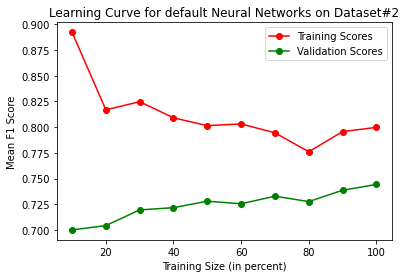

In [ ]:
plot_learning_curve_f1(mlp_clf, X_train, y_train, 'Learning Curve for default Neural Networks on Dataset#2')

## Tune Activations:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


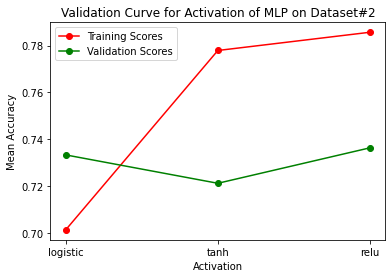

In [ ]:
clfs = []
activation_list = ['logistic', 'tanh', 'relu']

for i in activation_list:
    nn_clf = MLPClassifier(activation=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(activation_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(activation_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Activation')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for Activation of MLP on Dataset#2')
ax.legend()
plt.show(fig)

## Tune hidden layers:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


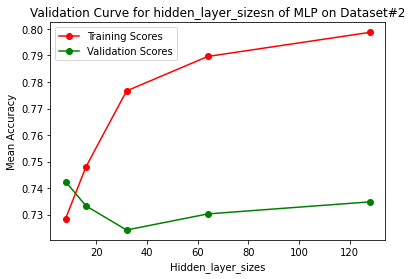

In [ ]:
clfs = []
hidden_layer_list = [(8), (16), (32), (64), (128)]

for i in hidden_layer_list:
    nn_clf = MLPClassifier(hidden_layer_sizes=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(hidden_layer_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(hidden_layer_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Hidden_layer_sizes')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for hidden_layer_sizesn of MLP on Dataset#2')
ax.legend()
plt.show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


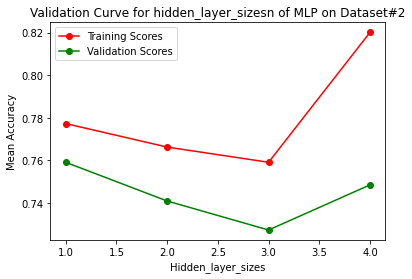

In [ ]:
clfs = []
hidden_layer_list = [(16,8), (16,4), (16, 2), (32, 16)]

for i in hidden_layer_list:
    nn_clf = MLPClassifier(hidden_layer_sizes=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot([1,2,3,4], training_score, 'o-', color="r", label='Training Scores')
ax.plot([1,2,3,4], validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Hidden_layer_sizes')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for hidden_layer_sizesn of MLP on Dataset#2')
ax.legend()
plt.show(fig)

## Tune NN: grid search cv

In [ ]:
params =  [{'activation':['logistic', 'tanh', 'relu'],
                'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]}]

mlp_clf = MLPClassifier(random_state=random_state)

mlp_grid_clf = GridSearchCV(mlp_clf, params, cv=5,
                           scoring='accuracy', return_train_score=True)

mlp_grid_clf.fit(X_train, y_train)
mlp_grid_best = mlp_grid_clf.best_estimator_

start_time = time.time()
mlp_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_mlp = mlp_grid_best.predict(X_test)

print_metrics(pred_mlp, y_test)

print("Training Accuracy is:", mlp_grid_best.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 1.327996015548706
Accuracy: 0.738929889298893
Precision: 0.7293666026871402
Recall: 0.7279693486590039
F1-Score: 0.7286673058485138
ROC-AUC: 0.7385398344718507
Training Accuracy is: 0.7772727272727272


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_grid_best

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


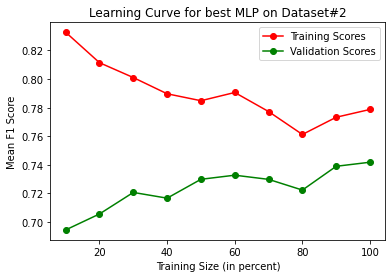

In [ ]:
plot_learning_curve_f1(mlp_grid_best, X_train, y_train, 'Learning Curve for best MLP on Dataset#2')

## Iterative curve NN:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


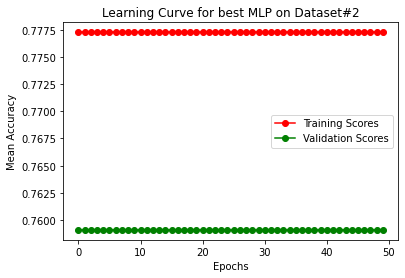

In [ ]:
clf = mlp_grid_best

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best MLP on Dataset#2')
ax.legend()
plt.show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


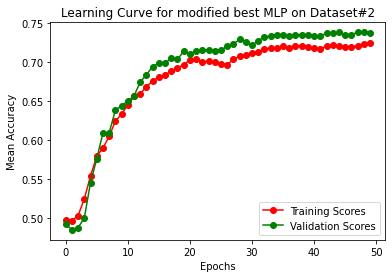

In [ ]:
clf = MLPClassifier(activation=mlp_grid_best.activation, 
                    hidden_layer_sizes=mlp_grid_best.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for modified best MLP on Dataset#2')
ax.legend()
plt.show(fig)

In [ ]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)